In [15]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


# read dataset.csv
bank_data = pd.read_csv("../data/bank_interest_model.csv")
# bank_data = bank_data.transpose()
print("\nPreview of bank dataset", bank_data.T.head(5))

# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",bank_data.shape)


Preview of bank dataset                                0        1        2        3        4     \
interest_rate                   8.9    12.12    21.98     9.99    11.71   
fico_range                  735-739  715-719  690-694  695-699  695-699   
amount_requested            20000.0  19200.0  35000.0  10000.0  12000.0   
amount_funded_by_investors  20000.0  19200.0  35000.0   9975.0  12000.0   
loan_length                    36.0     36.0     60.0     36.0     36.0   

                               5        6        7        8        9     ...  \
interest_rate                 15.31      7.9    17.14    14.33     6.91  ...   
fico_range                  670-674  720-724  705-709  685-689  715-719  ...   
amount_requested             6000.0  10000.0  33500.0  14675.0   7000.0  ...   
amount_funded_by_investors   6000.0  10000.0  33450.0  14675.0   7000.0  ...   
loan_length                    36.0     36.0     60.0     36.0     36.0  ...   

                               2488     248

In [2]:
# displays the data type and information about the data
# 4/5 Dtypes are float64, 1/5 Dtypes are object
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [3]:
# Checking for duplication
# numbers represent how many unique values there are
bank_data.nunique()

interest_rate                 273
fico_range                     38
amount_requested              380
amount_funded_by_investors    708
loan_length                     2
dtype: int64

In [4]:
# checks for any null values
# zero null values found
bank_data.isnull().sum()

interest_rate                 0
fico_range                    0
amount_requested              0
amount_funded_by_investors    0
loan_length                   0
dtype: int64

In [5]:
# Drop amount_requested column
bank_data = bank_data.drop(columns='amount_requested')
print(bank_data)

      interest_rate fico_range  amount_funded_by_investors  loan_length
0              8.90    735-739                    20000.00         36.0
1             12.12    715-719                    19200.00         36.0
2             21.98    690-694                    35000.00         60.0
3              9.99    695-699                     9975.00         36.0
4             11.71    695-699                    12000.00         36.0
...             ...        ...                         ...          ...
2493          16.77    705-709                    29950.00         60.0
2494          14.09    740-744                    16000.00         60.0
2495          13.99    680-684                    10000.00         36.0
2496          12.42    675-679                     6000.00         36.0
2497          13.79    670-674                     5242.75         36.0

[2498 rows x 4 columns]


In [6]:
# Given fico_range a numerical value based off its mean
bank_data['fico_range'] = bank_data['fico_range'].apply(lambda x: sum(map(int, x.split('-'))) / 2.0)

In [7]:
# visually confirmed fico_range values have been converted into numerical value
bank_data

,interest_rate,fico_range,amount_funded_by_investors,loan_length
0,8.90,737.0,20000.00,36.0
1,12.12,717.0,19200.00,36.0
2,21.98,692.0,35000.00,60.0
3,9.99,697.0,9975.00,36.0
4,11.71,697.0,12000.00,36.0
...,...,...,...,...
2493,16.77,707.0,29950.00,60.0
2494,14.09,742.0,16000.00,60.0
2495,13.99,682.0,10000.00,36.0
2496,12.42,677.0,6000.00,36.0


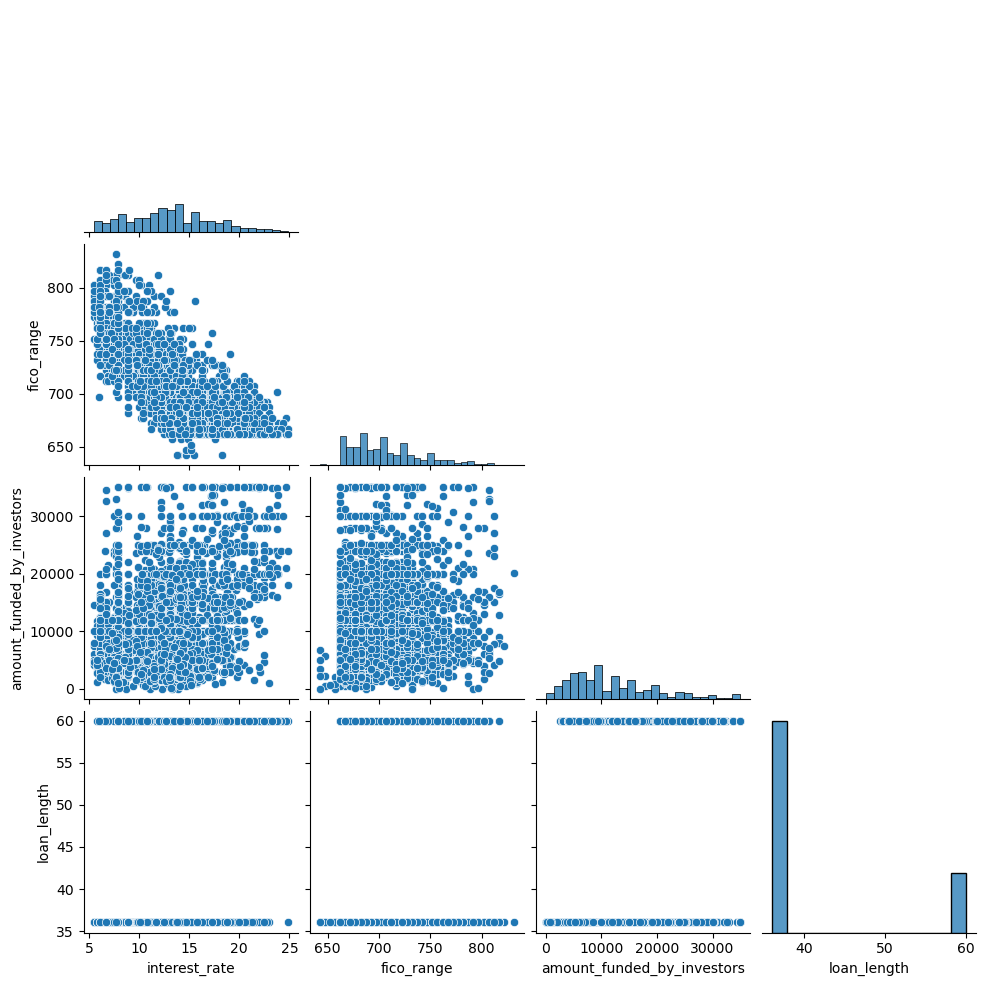

In [8]:
# created a pair plot to identify relationships between variables
sns.pairplot(data=bank_data, corner=True)

In [9]:
# Creates OLS Regresssion Results
# Allows us to see what values are important to us by looking at the P value
# Observed p values are all zero
X_banking = sm.add_constant(bank_data[['fico_range', 'amount_funded_by_investors', 'loan_length']])
y_banking = bank_data['interest_rate']
model_banking = sm.OLS(y_banking, X_banking)
results_banking = model_banking.fit()
print(results_banking.summary())

                            OLS Regression Results                            
Dep. Variable:          interest_rate   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2433.
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:40:46   Log-Likelihood:                -5407.3
No. Observations:                2498   AIC:                         1.082e+04
Df Residuals:                    2494   BIC:                         1.085e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

<Axes: xlabel='predicted', ylabel='residuals'>

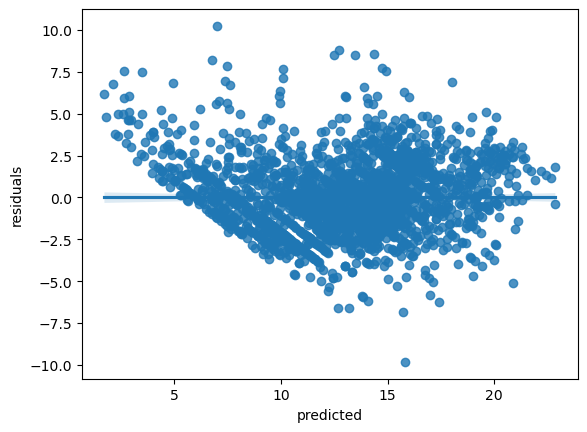

In [10]:
# Added columns predicted and residuals
bank_data['predicted'] = results_banking.predict(X_banking)
bank_data['residuals'] = y_banking - bank_data['predicted']

# Created regression plot
sns.regplot(x=bank_data['predicted'], y=bank_data['residuals'])

C:\Users\monke\AppData\Local\Temp\ipykernel_73720\61167692.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_sample['predicted'] = results_banking.predict(X_banking)
C:\Users\monke\AppData\Local\Temp\ipykernel_73720\61167692.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data_sample['residuals'] = y_banking - bank_data_sample['predicted']


<Axes: xlabel='predicted', ylabel='residuals'>

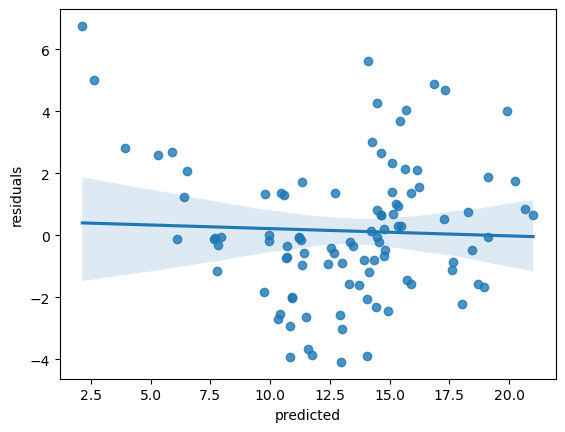

In [11]:
# Took a sample of 100 datapoints from bank_data
# Based off these samples we can check if the data is heteroscedastic
bank_data_sample = bank_data.head(100)
X_banking = sm.add_constant(bank_data_sample[['fico_range', 'amount_funded_by_investors', 'loan_length']])
y_banking = bank_data_sample['interest_rate']
bank_data_sample['predicted'] = results_banking.predict(X_banking)
bank_data_sample['residuals'] = y_banking - bank_data_sample['predicted']

# Created regression plot
sns.regplot(x=bank_data_sample['predicted'], y=bank_data_sample['residuals'])

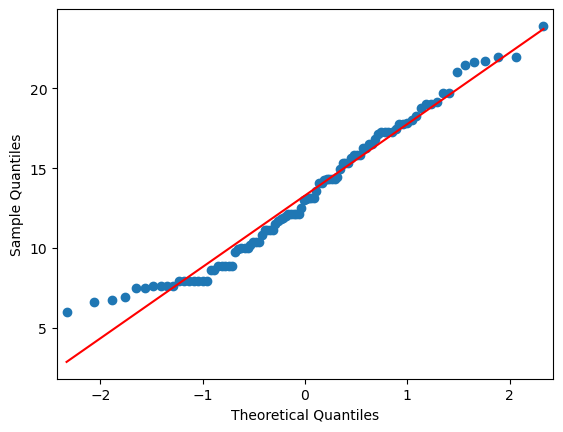

In [12]:
# Sort the P values
# Generates a linear regression graph
# Checking to see if the residuals are normally distributed
bank_sample_sorted = bank_data_sample['interest_rate'].sort_values()
sm.qqplot(bank_sample_sorted, line='r');

In [13]:
# What the eff is a Decision Tree
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_banking, y_banking)
y_tree_pred = tree.predict(X_banking)

In [16]:
# # arange for creating a range of values 
# # from min value of X to max value of X 
# # with a difference of 0.01 between two
# # consecutive values
# X_grid = np.arange(min(X_banking), max(X_banking), 0.01)
  
# # reshape for reshaping the data into 
# # a len(X_grid)*1 array, i.e. to make
# # a column out of the X_grid values
# X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# # scatter plot for original data
# plt.scatter(X_tree, y_tree, color = 'red')
  
# # plot predicted data
# plt.plot(X_grid, tree.predict(X_grid), color = 'blue') 
  
# # specify title
# plt.title('Balance to Limit (Decision Tree Regression)') 
  
# # specify X axis label
# plt.xlabel('Limit')
  
# # specify Y axis label
# plt.ylabel('Balance')
  
# # show the plot
# plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_banking, y_banking, test_size=0.2, random_state=0)
ridge_model = Ridge(alpha=.5)
ridge_model.fit(X_train, y_train)
predict = ridge_model.predict(X_test)

In [18]:
print(predict)

[14.88617777  1.95208506 19.93272412 11.09716434 14.62263248 14.68319305
 13.23051294 16.22147198 18.05071054  7.81474961 20.96200848 15.50307869
 16.01848726 12.04544822 18.38142381 19.2657467  19.36350381 18.64511053
 18.46903168 14.63431449]


In [19]:
print(y_test)

26    14.42
86     8.90
2     21.98
55    11.14
75    13.12
93    14.35
16    12.12
73    17.27
54    17.80
95     6.62
53    21.49
92    15.81
78    17.77
13     8.90
7     17.14
30    21.00
22    17.99
24    16.82
33    15.80
8     14.33
Name: interest_rate, dtype: float64


In [21]:
# find mse
# mse errors found are the calcution of the true values and predicted values
# from the regression model 
mean_squared_error(y_test, predict)

4.459656741161137